## Exploración de datos
1. Carga de los datos vía API del ayuntamiento
2. Registros por años
4. Contar el número de palabras en el texto
5. Distribución de palabras por mensajes
6. Comprobar si en el tiempo no ha cambiado el nombre o el código de los servicios



### 1) Carga de datos 

In [1]:
import pandas as pd
import requests
import datetime

def fetch_data(start_date, end_date, year):

    all_results = []
    start_row = 0
    rows_per_page = 1000

    while True:
        url = f"https://www.zaragoza.es/sede/servicio/quejas-sugerencias.json?start_date={start_date}&end_date={end_date}&start={start_row}&rows={rows_per_page}&fl=service_request_id,title,description,requested_datetime,service_name,service_code,portal&results_only=false"
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        data = response.json()

        all_results.extend(data["result"])

        if start_row + rows_per_page >= data["totalCount"]:
            break  # Exit the loop when all data is fetched

        start_row += rows_per_page

    return all_results


df = pd.DataFrame()
# seleccionamos los años del 2013 al 2024
for year in range(2013, 2025):
    start_date = f"{year}-01-01T00%3A00%3A00Z"
    end_date = f"{year}-12-31T23%3A59%3A59Z"

    results = fetch_data(start_date, end_date, year)

    
    year_df = pd.DataFrame(results)

    # Generamos partiendo de requested_datetime el campo year que no aparece en la API
    year_df['requested_datetime'] = pd.to_datetime(year_df['requested_datetime'])
    year_df["year"] = year_df['requested_datetime'].dt.year

    df = pd.concat([df, year_df], ignore_index=True)

In [2]:
df

,service_request_id,service_code,service_name,title,description,requested_datetime,year,portal
0,377945,5144576,Instalaciones Deportivas,Equipo Flip-Flap,Me dirijo a ustedes aprovechando este servicio...,2013-12-22 23:34:14,2013,NaN
1,377944,5144576,Instalaciones Deportivas,Instalación deportiva para gimnasia deportiva,Soy el padre de un chaval que practica el exig...,2013-12-22 21:59:50,2013,NaN
2,377943,4849673,Medioambiente,Duda Permisos,"Hola, escribo en nombre de un grupo numeroso s...",2013-12-22 19:43:40,2013,NaN
3,377940,4849666,Policia Local,Noches Jueves viernes y sábado,"Cada vez es más imposible dormir y descansar, ...",2013-12-22 15:19:44,2013,NaN
4,377939,5144576,Instalaciones Deportivas,Falta de instalaciones deportivas,Somos una familia amante del deporte en genera...,2013-12-22 12:53:27,2013,NaN
...,...,...,...,...,...,...,...,...
66452,795208,212,Cubos,Reposición o reparación de cubo de basura,"Buenos días, agradeceremos nos sustituyan o re...",2024-01-02 11:10:25,2024,NaN
66453,795202,10,Acera,Baldosas defectuosas,Justo en la puerta de la vivienda hay baldosas...,2024-01-02 11:01:33,2024,"{'id': 12002, 'calle': {}, 'numero': 16, 'junt..."
66454,795185,97550336,Movilidad Urbana. Transporte Público,Aviso de que reclamación sigue sin respuesta,Buenos días; hace ya unos días que puse una qu...,2024-01-02 10:10:55,2024,NaN
66455,795166,503,Basura y enseres alrededor de los contenedores,Recogida de basura,"Buenos dias, muestro mi malestar al ver el con...",2024-01-02 09:13:02,2024,NaN


In [4]:
#Generar un csv con los datos
if df is not None:
  df.to_csv('qys_original.csv', sep=';', index=False)
else:
  print("No se cargaron archivos.")

In [8]:
#Comprobar que está bien generado
df_csv = pd.read_csv('qys_original.csv', sep=";")


In [7]:
df_csv

,service_request_id,service_code,service_name,title,description,requested_datetime,year,portal
0,377945,5144576,Instalaciones Deportivas,Equipo Flip-Flap,Me dirijo a ustedes aprovechando este servicio...,2013-12-22 23:34:14,2013,NaN
1,377944,5144576,Instalaciones Deportivas,Instalación deportiva para gimnasia deportiva,Soy el padre de un chaval que practica el exig...,2013-12-22 21:59:50,2013,NaN
2,377943,4849673,Medioambiente,Duda Permisos,"Hola, escribo en nombre de un grupo numeroso s...",2013-12-22 19:43:40,2013,NaN
3,377940,4849666,Policia Local,Noches Jueves viernes y sábado,"Cada vez es más imposible dormir y descansar, ...",2013-12-22 15:19:44,2013,NaN
4,377939,5144576,Instalaciones Deportivas,Falta de instalaciones deportivas,Somos una familia amante del deporte en genera...,2013-12-22 12:53:27,2013,NaN
...,...,...,...,...,...,...,...,...
66452,795208,212,Cubos,Reposición o reparación de cubo de basura,"Buenos días, agradeceremos nos sustituyan o re...",2024-01-02 11:10:25,2024,NaN
66453,795202,10,Acera,Baldosas defectuosas,Justo en la puerta de la vivienda hay baldosas...,2024-01-02 11:01:33,2024,"{'id': 12002, 'calle': {}, 'numero': 16, 'junt..."
66454,795185,97550336,Movilidad Urbana. Transporte Público,Aviso de que reclamación sigue sin respuesta,Buenos días; hace ya unos días que puse una qu...,2024-01-02 10:10:55,2024,NaN
66455,795166,503,Basura y enseres alrededor de los contenedores,Recogida de basura,"Buenos dias, muestro mi malestar al ver el con...",2024-01-02 09:13:02,2024,NaN


In [9]:
# analizar que columnas tienen valores vacíos y cuantos son
if df is not None:
  empty_values_by_column = df.isnull().sum()
  print("Columnas vacias y valores:")
  print(empty_values_by_column[empty_values_by_column > 0])
else:
  print("DataFrame vacop.")

Columnas vacias y valores:
portal    52677
dtype: int64


In [10]:
# Creamos un nuevo dataset sin portal
if df is not None:
  df_no_portal = df.drop('portal', axis=1, errors='ignore')


In [11]:
df_no_portal.head()

,service_request_id,service_code,service_name,title,description,requested_datetime,year
0,377945,5144576,Instalaciones Deportivas,Equipo Flip-Flap,Me dirijo a ustedes aprovechando este servicio...,2013-12-22 23:34:14,2013
1,377944,5144576,Instalaciones Deportivas,Instalación deportiva para gimnasia deportiva,Soy el padre de un chaval que practica el exig...,2013-12-22 21:59:50,2013
2,377943,4849673,Medioambiente,Duda Permisos,"Hola, escribo en nombre de un grupo numeroso s...",2013-12-22 19:43:40,2013
3,377940,4849666,Policia Local,Noches Jueves viernes y sábado,"Cada vez es más imposible dormir y descansar, ...",2013-12-22 15:19:44,2013
4,377939,5144576,Instalaciones Deportivas,Falta de instalaciones deportivas,Somos una familia amante del deporte en genera...,2013-12-22 12:53:27,2013


### 2) Registros por año 

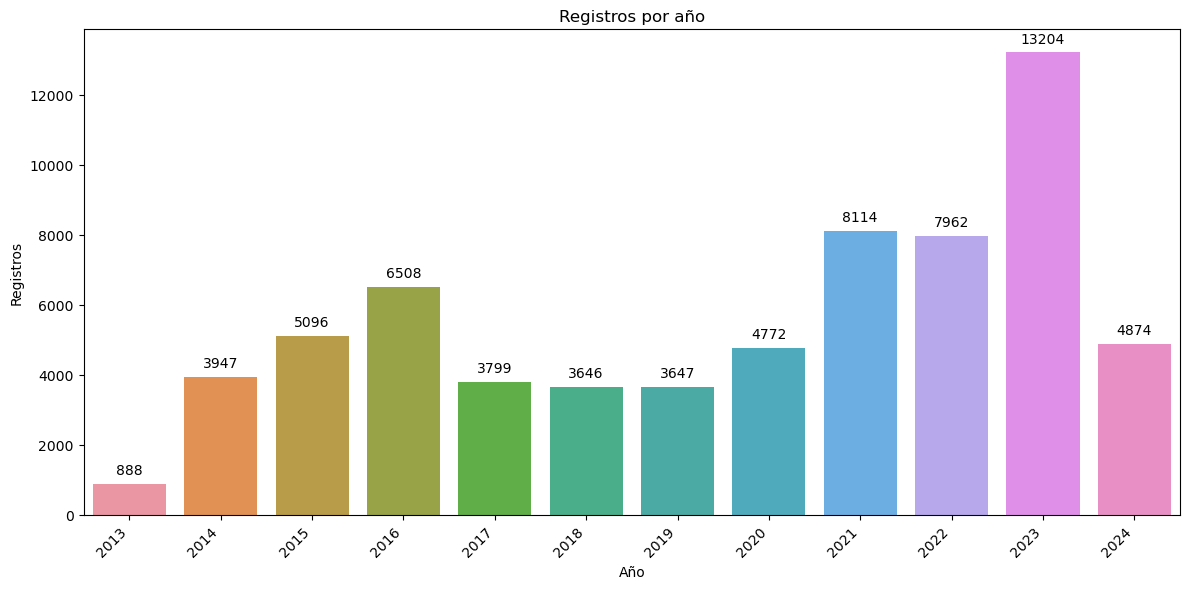

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


records_per_year = df_no_portal.groupby('year').size().reset_index(name='counts')


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='year', y='counts', data=records_per_year)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Año')
plt.ylabel('Registros')
plt.title('Registros por año')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [13]:
# Creamos otro dataFrame para trabajar los textos
df_word = df_no_portal.copy()

df_word['title'] = df_word['title'].fillna('')
df_word['description'] = df_word['description'].fillna('')

# Creamos el campo texto como concatenación de título y descripción
df_word['texto'] = df_word['title'].astype(str) + ' ' + df_word['description'].astype(str)

In [14]:
df_word.head()

,service_request_id,service_code,service_name,title,description,requested_datetime,year,texto
0,377945,5144576,Instalaciones Deportivas,Equipo Flip-Flap,Me dirijo a ustedes aprovechando este servicio...,2013-12-22 23:34:14,2013,Equipo Flip-Flap Me dirijo a ustedes aprovecha...
1,377944,5144576,Instalaciones Deportivas,Instalación deportiva para gimnasia deportiva,Soy el padre de un chaval que practica el exig...,2013-12-22 21:59:50,2013,Instalación deportiva para gimnasia deportiva ...
2,377943,4849673,Medioambiente,Duda Permisos,"Hola, escribo en nombre de un grupo numeroso s...",2013-12-22 19:43:40,2013,"Duda Permisos Hola, escribo en nombre de un gr..."
3,377940,4849666,Policia Local,Noches Jueves viernes y sábado,"Cada vez es más imposible dormir y descansar, ...",2013-12-22 15:19:44,2013,Noches Jueves viernes y sábado Cada vez es más...
4,377939,5144576,Instalaciones Deportivas,Falta de instalaciones deportivas,Somos una familia amante del deporte en genera...,2013-12-22 12:53:27,2013,Falta de instalaciones deportivas Somos una fa...


### 3) Contar palabras 

In [15]:
# Generamos un nuevo campo con el conteo de palabras en el campo texto
import re

def count_words(text):
    words = re.findall(r'\b\w+\b',text)
    return len(words)

df_word['count_word'] = df_word['texto'].apply(count_words)

df_word.head()

,service_request_id,service_code,service_name,title,description,requested_datetime,year,texto,count_word
0,377945,5144576,Instalaciones Deportivas,Equipo Flip-Flap,Me dirijo a ustedes aprovechando este servicio...,2013-12-22 23:34:14,2013,Equipo Flip-Flap Me dirijo a ustedes aprovecha...,271
1,377944,5144576,Instalaciones Deportivas,Instalación deportiva para gimnasia deportiva,Soy el padre de un chaval que practica el exig...,2013-12-22 21:59:50,2013,Instalación deportiva para gimnasia deportiva ...,239
2,377943,4849673,Medioambiente,Duda Permisos,"Hola, escribo en nombre de un grupo numeroso s...",2013-12-22 19:43:40,2013,"Duda Permisos Hola, escribo en nombre de un gr...",86
3,377940,4849666,Policia Local,Noches Jueves viernes y sábado,"Cada vez es más imposible dormir y descansar, ...",2013-12-22 15:19:44,2013,Noches Jueves viernes y sábado Cada vez es más...,75
4,377939,5144576,Instalaciones Deportivas,Falta de instalaciones deportivas,Somos una familia amante del deporte en genera...,2013-12-22 12:53:27,2013,Falta de instalaciones deportivas Somos una fa...,120


In [16]:
# Estadísticas sobre palabras
word_count_stats = df_word['count_word'].describe()
print(word_count_stats)

count    66457.000000
mean        85.797418
std         69.622734
min          2.000000
25%         38.000000
50%         67.000000
75%        109.000000
max        623.000000
Name: count_word, dtype: float64


In [18]:
# Calculamos la moda
moda = df_word['count_word'].mode()[0]
print(f"Moda: {moda}")

Moda: 29


In [ ]:
Q1 = df['n_palabras'].quantile(0.25)
Q3 = df['n_palabras'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = df[(df['n_palabras'] < lim_inf) | (df['n_palabras'] > lim_sup)]


In [20]:
# Mostrar textos cortos
textos_cortos = df_word[df_word['count_word'] < 5]
textos_cortos['texto']

3276                                prueba3 Prueba3
4104     carteles pornograficos   Espectáculo hole 
4283          Incidencia Adjunto archivo solicitado
21313                                     Poda Poda
21315                          Poda Sin comentarios
23036          Apoyo participacion Colegio vadorrey
23878                        Baldosa rota   Agujero
26613                   Papelera rota Papelera rota
28926                   Árbol partido Árbol partido
34761                Limpieza calles Email anterior
35832                       Señal caida Señal caida
38190                     Baldosa rota Baldosa rota
38392                     Baldosa rota Baldosa rota
38512                     Baldosa rota Baldosa rota
47062                          Adopción animal Gato
47578                 Farola fundida Farola fundida
49358                 Basuras, escombros Nueva foto
49359                 Basuras, escombros Nueva foto
49360                 Basuras  escombros Nueva foto
49745       

### 4) Distribución de palabras 

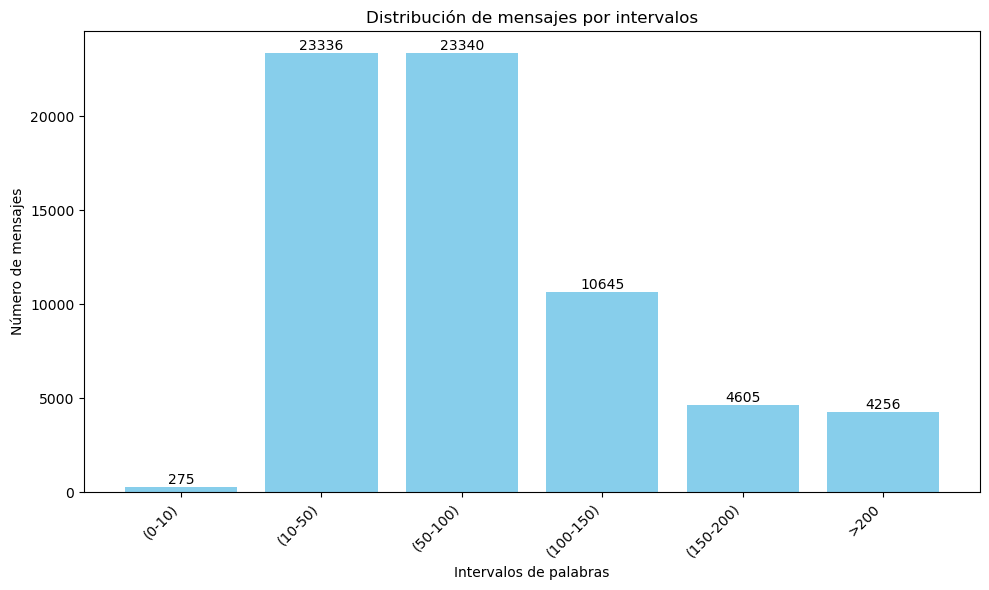

In [23]:
# Mostrar intervalos
intervals = {
    "(0-10)": (0, 10),
    "(10-50)": (10, 50),
    "(50-100)": (50, 100),
    "(100-150)": (100, 150),
    "(150-200)": (150, 200),
    ">200": (200, float('inf'))  # Use infinity for the upper bound
}

# Contar registros de cada intervalo
counts = {}
for label, (lower, upper) in intervals.items():
    counts[label] = len(df_word[(df_word['count_word'] >= lower) & (df_word['count_word'] < upper)])

# Print the results
#for label, count in counts.items():
#    print(f"Nº de mensajes con el intervalo de palabras {label}: {count}")
labels = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(labels, values, color='skyblue')  # Create the bar chart

plt.xlabel("Intervalos de palabras")
plt.ylabel("Número de mensajes")
plt.title("Distribución de mensajes por intervalos")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add value labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom') # Adjust vertical offset (5) as needed


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

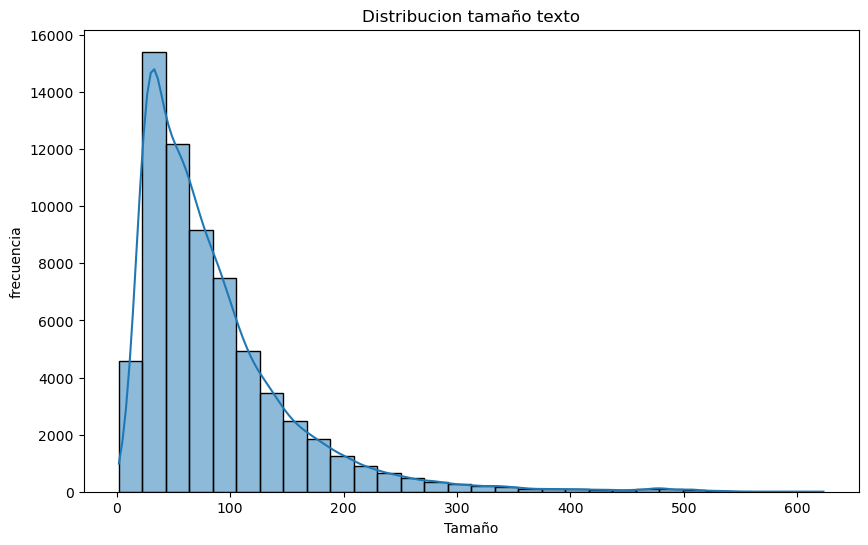

In [24]:
import seaborn as sns

if df_word is not None:
  plt.figure(figsize=(10, 6))
  sns.histplot(df_word['count_word'], bins=30, kde=True)
  plt.title('Distribucion tamaño texto')
  plt.xlabel('Tamaño')
  plt.ylabel('frecuencia')
  plt.show()
else:
  print("No se cargaron archivos.")

### 5) Comprobar que en el tiempo no ha cambiado el código de un servicio o su nombre

In [30]:
df_filtrado=df_no_portal[['service_code', 'service_name']]
df_filtrado

,service_code,service_name
0,5144576,Instalaciones Deportivas
1,5144576,Instalaciones Deportivas
2,4849673,Medioambiente
3,4849666,Policia Local
4,5144576,Instalaciones Deportivas
...,...,...
66452,212,Cubos
66453,10,Acera
66454,97550336,Movilidad Urbana. Transporte Público
66455,503,Basura y enseres alrededor de los contenedores


In [41]:
 df_filtrado.to_csv('df_filtrado.csv', sep=';', index=False)

In [40]:
valores_unicos = df_filtrado['service_name'].value_counts()
valores_unicos

service_name
Policia Local                           5085
Movilidad Urbana. Transporte Público    3313
Movilidad Urbana: Señalización          3191
Limpieza viaria                         3162
Parques y Jardines                      3132
                                        ... 
ENTRACAVADOS ARBUSTOS Y SETOS              1
ESCARDA ARBUSTOS Y SETOS                   1
ABONADO FLORES                             1
Inspección Urbanística                     1
Agua                                       1
Name: count, Length: 225, dtype: int64

In [55]:
df_agrupado = df_filtrado.groupby('service_name')['service_code'].value_counts()
print(df_agrupado)

service_name                 service_code
ABONADO ARBUSTOS             1805              1
ABONADO CESPED               1803              3
ABONADO FLORES               1804              1
ALCORQUES                    1402            102
ALUMBRADO DETERIORADO(ROTO)  1106              4
                                            ... 
Valdespartera                290             313
Web Municipal                4784129          51
Zaragoza Cultural            5144580         288
Zaragoza Deporte             1000012         526
Zaragoza Internacional       16777216          4
Name: count, Length: 232, dtype: int64


In [44]:
df_nuevo = df_agrupado.reset_index(name='count')
df_nuevo.columns = ['service_name', 'service_code', 'count']

In [49]:
filas_duplicadas = df_nuevo[df_nuevo.duplicated(subset=['service_name'])]
filas_duplicadas['service_name']

27              Bache
66        Deteriorada
85     FALTA DE RIEGO
105           Hundida
150             Otros
154        PAVIMENTOS
202             Rotos
Name: service_name, dtype: object

In [54]:
# Obtener los valores únicos de service_name en filas duplicadas
valores_duplicados = filas_duplicadas['service_name'].unique()

# Filtrar df_agrupado por estos valores
registros_duplicados = df_nuevo[df_agrupado['service_name'].isin(valores_duplicados)]

print(registros_duplicados)

       service_name  service_code  count
26            Bache            61    755
27            Bache            11     19
65      Deteriorada            12    166
66      Deteriorada            62    131
84   FALTA DE RIEGO          1503     21
85   FALTA DE RIEGO          1801     11
104         Hundida            14     18
105         Hundida            83      5
149           Otros           330     50
150           Otros       1000004     24
153      PAVIMENTOS          1604     65
154      PAVIMENTOS          1209     40
201           Rotos            31     15
202           Rotos            71      9


In [56]:
valores_unicos_code = df_filtrado['service_code'].value_counts()
valores_unicos_code

service_code
4849666     5085
97550336    3313
1000007     3191
250         3162
4849671     3132
            ... 
515            1
1703           1
1807           1
1809           1
30005          1
Name: count, Length: 232, dtype: int64

In [57]:
df_agrupado_code = df_filtrado.groupby('service_code')['service_name'].value_counts()
print(df_agrupado_code)

service_code  service_name                     
2             INTERNAL                             1621
10            Acera                                1485
11            Bache                                  19
12            Deteriorada                           166
13            Elevada                                28
                                                   ... 
109740033     Admin. Electrónica: IyD               228
109740034     Admin. Electrónica: telefónica          5
118587392     Oficina Municipal del Agua            239
184647680     Gestión Web                            90
188088321     Servicio Técnico Infraestructuras     233
Name: count, Length: 232, dtype: int64


In [59]:
df_nuevo_code = df_agrupado_code.reset_index(name='count')
df_nuevo_code.columns = ['service_code', 'service_name', 'count']

In [60]:
filas_duplicadas = df_nuevo_code[df_nuevo_code.duplicated(subset=['service_code'])]
filas_duplicadas['service_code']

Series([], Name: service_code, dtype: int64)